# Classifying Fashion-MNIST

In this notebook [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) will be used to train a MLT network to detect the type of the clothes. Ofcourse as MLT is only used the accuracy is excpected not to be the best. 

<img src='assets/fashion-mnist-sprite.png' width=500px>
<center>*sample of the dataset*</center>

Let's import necessary modules and load the data

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from collections import OrderedDict

import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5], [0.5])])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

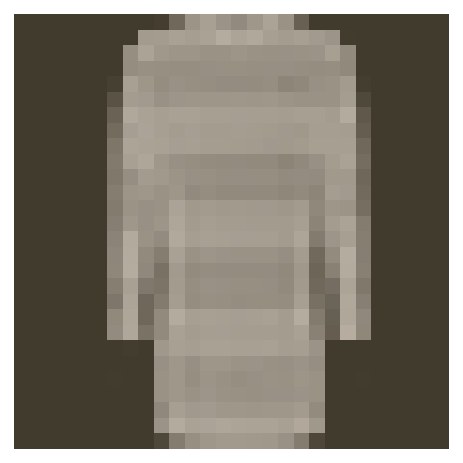

In [9]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Seduential nn with Ordered Dict

In [20]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [400, 200]
output_size = 10
learning_rate = 0.1
epochs = 5
print_every = 80
steps = 0

# TODO: Define your network architecture here
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

# Train the network

In [1]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

NameError: name 'nn' is not defined

In [22]:
# Train the network
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0


Epoch: 1/5...  Loss: 2.2635
Epoch: 1/5...  Loss: 2.0300
Epoch: 1/5...  Loss: 1.8383
Epoch: 1/5...  Loss: 1.7944
Epoch: 1/5...  Loss: 1.7708
Epoch: 1/5...  Loss: 1.7320
Epoch: 1/5...  Loss: 1.7130
Epoch: 1/5...  Loss: 1.7029
Epoch: 1/5...  Loss: 1.6940
Epoch: 1/5...  Loss: 1.6895
Epoch: 1/5...  Loss: 1.6838
Epoch: 2/5...  Loss: 0.4661
Epoch: 2/5...  Loss: 1.6791
Epoch: 2/5...  Loss: 1.6748
Epoch: 2/5...  Loss: 1.6785
Epoch: 2/5...  Loss: 1.6779
Epoch: 2/5...  Loss: 1.6655
Epoch: 2/5...  Loss: 1.6738
Epoch: 2/5...  Loss: 1.6757
Epoch: 2/5...  Loss: 1.6710
Epoch: 2/5...  Loss: 1.6758
Epoch: 2/5...  Loss: 1.6652
Epoch: 2/5...  Loss: 1.6687
Epoch: 3/5...  Loss: 0.9130
Epoch: 3/5...  Loss: 1.6677
Epoch: 3/5...  Loss: 1.6592
Epoch: 3/5...  Loss: 1.6632
Epoch: 3/5...  Loss: 1.6610
Epoch: 3/5...  Loss: 1.6603
Epoch: 3/5...  Loss: 1.6548
Epoch: 3/5...  Loss: 1.6713
Epoch: 3/5...  Loss: 1.6631
Epoch: 3/5...  Loss: 1.6603
Epoch: 3/5...  Loss: 1.6559
Epoch: 3/5...  Loss: 1.6499
Epoch: 4/5...  Loss:

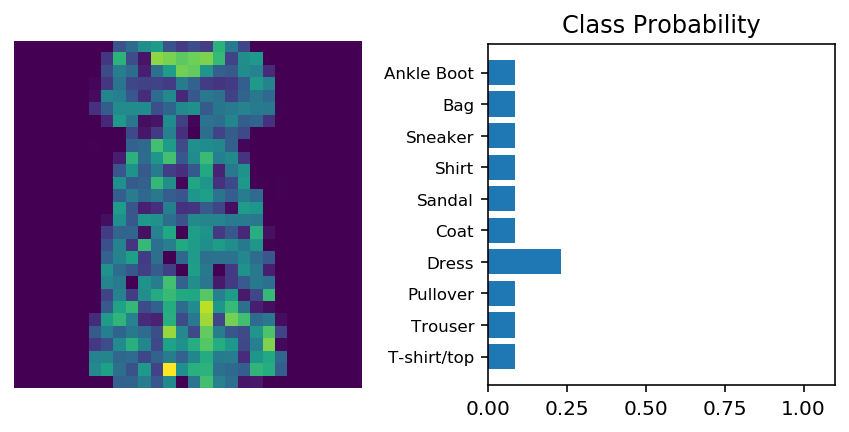

In [24]:
# Test out the network! (wit training set)

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')